# Titanic Data Science Solutions


The notebook walks us through a typical workflow for solving data science competitions at sites like Kaggle.

# Question

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



In [119]:
#importing libraries
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
#**********************************************************
#Acquiring dataset
train_data=pd.read_csv('../input/train.csv')
test_data=pd.read_csv('../input/test.csv')
together=[train_data, test_data]
#**************************************************************
#describing data
print(train_data.columns.values)
train_data.head()
train_data.drop(columns="Survived")
#****************************************************************
#Checking for missing data
print(train_data.isnull().sum())
print('_'*40)
print(test_data.isnull().sum())
#************************************************************

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [120]:
#describing data
print(train_data.columns.values)
train_data.head()
train_data.drop(columns="Survived")
#*********************************************************
#Checking for missing data
print(train_data.isnull().sum())
print('_'*40)
print(test_data.isnull().sum())



['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [121]:
train_data.head(30)
#we have categorical and numerical features in this dataset
#categorical: Survived, Sex, Embarked, Ordinal: Pclass
#Continous: Age, Fare. Discrete: : SibSp, Parch

#Ticket feature is an alphanumeric feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [122]:
train_data.info()
print('__'*50)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
P

total number of passenger is: 891
Percentage of survived passengers out of all the passengers is: 38.38383838383838
Percentage of passengers who travel without siblings or spouse :68.23793490460157
Percentage of passengers who travel with one sibling or spouse :23.45679012345679
Percentage of passengers who paid at most $222: 98.31649831649831
 Percentage of passengers who were 40 or more than 40 years old: 18.29405162738496
Percentage of survived passengers who were more than 70 years old: 1.4619883040935673
-------rate of survived passengers in each class-------
Pclass=1: 63.1578947368421
Pclass=2: 53.801169590643276
Pclass=3: 143.5672514619883
________________rate of survived passenger_________________________
the percentage of male passenger is: 64.75869809203142
the percentage of female passenger is :35.24130190796858
the percentage of male passengers who survived is: 168.71345029239765
the percentage of female passengers who survived is: 91.81286549707602


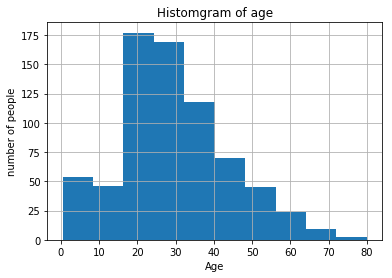

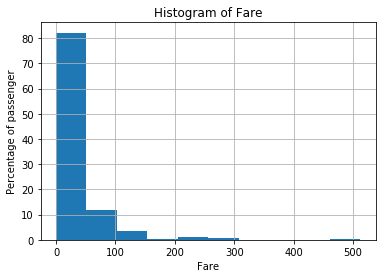

In [123]:
train_data.describe()

#the total number of passenger is 891 person. 
print("total number of passenger is: " + str(train_data["PassengerId"].count()))

ax=train_data.hist(column= "Age", bins=10)
plt.title("Histomgram of age")
plt.xlabel("Age")
plt.ylabel("number of people")
#Percentage of Survived persons

print("Percentage of survived passengers out of all the passengers is: "+ str((train_data["Survived"]== 1).sum()*100/train_data["PassengerId"].count()))
print("Percentage of passengers who travel without siblings or spouse :"+ str((train_data["SibSp"]== 0).sum()*100/train_data["PassengerId"].count()))
print("Percentage of passengers who travel with one sibling or spouse :"+ str((train_data["SibSp"]== 1).sum()*100/train_data["PassengerId"].count()))      
print("Percentage of passengers who paid at most $222: " + str((train_data["Fare"] <= 222).sum()*100/train_data["PassengerId"].count())) 
print(" Percentage of passengers who were 40 or more than 40 years old: "+ str((train_data["Age"] >= 40).sum()*100/train_data["PassengerId"].count())) 
print("Percentage of survived passengers who were more than 70 years old: "+str ((train_data["Age"] > 70).sum()*100/(train_data["Survived"]==1).sum()))

print("-------rate of survived passengers in each class-------")
print("Pclass=1: "+str(((train_data["Pclass"] == 1).sum()*100)/(train_data["Survived"]==1).sum()))
print("Pclass=2: " +str((train_data["Pclass"] == 2).sum()*100/(train_data["Survived"]==1).sum()))
print("Pclass=3: "+ str((train_data["Pclass"] == 3).sum()*100/(train_data["Survived"]==1).sum()))


ax7=train_data.hist(column= "Fare", bins=10, weights=np.ones_like(train_data["Fare"]) * 100. / len(train_data["Fare"]))
# train_data["Fare"].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)
# ax2=train_data["Fare"].hist(bins=20, weights=np.ones_like(train_data["Fare"]) * 100. / len(train_data["Fare"]))
plt.title("Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Percentage of passenger")

print("________________rate of survived passenger_________________________")
print("the percentage of male passenger is: "+str((train_data["Sex"]== "male").sum()*100/(train_data["PassengerId"]).count()))
print("the percentage of female passenger is :"+ str((train_data["Sex"]== "female").sum()*100/(train_data["PassengerId"]).count()))
print("the percentage of male passengers who survived is: "+ str((train_data["Sex"]== "male").sum()*100/(train_data["Survived"]==1).sum()))
print("the percentage of female passengers who survived is: "+str((train_data["Sex"]== "female").sum()*100/(train_data["Survived"]==1).sum()))



In [124]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bourke, Mrs. John (Catherine)",male,347082,G6,S
freq,1,577,7,4,644


<class 'pandas.core.frame.DataFrame'>
        PassengerId  Survived  Pclass     ...      SibSp  Parch        Fare
Sex                                       ...                              
female       135343       233     678     ...        218    204  13966.6628
male         262043       109    1379     ...        248    136  14727.2865

[2 rows x 7 columns]


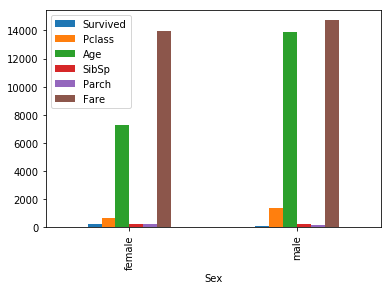

In [125]:

print(type(train_data.groupby('Sex').sum()))
table1=train_data.groupby("Sex").sum()
print(table1)
table2=table1.drop("PassengerId",1)
table2.groupby('Sex').sum().plot(kind='bar')


In [126]:
train_data[["Pclass", "PassengerId"]].groupby(["Pclass"], as_index=False).count()


,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


male      577
female    314
Name: Sex, dtype: int64


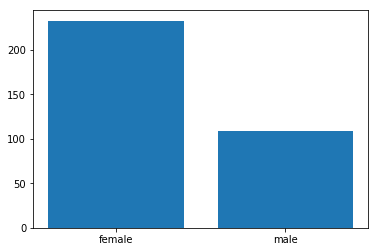

In [127]:
df=train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).sum() 
fig,ax=plt.bar(x=df["Sex"], height=df["Survived"])
# print(df)
print(train_data["Sex"].value_counts())


In [128]:
da=train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by="Survived", ascending=False)
print(da)


   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [129]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


0.32604735883424407
0.5233918128654971


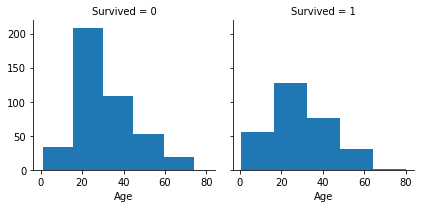

In [130]:

print((train_data["Age"] <= 20).sum()/(train_data["Survived"]==0).sum())
print((train_data["Age"] <= 20).sum()/(train_data["Survived"]==1).sum())

g=sns.FacetGrid(train_data, col= "Survived")
g.map(plt.hist,"Age", bins=5)

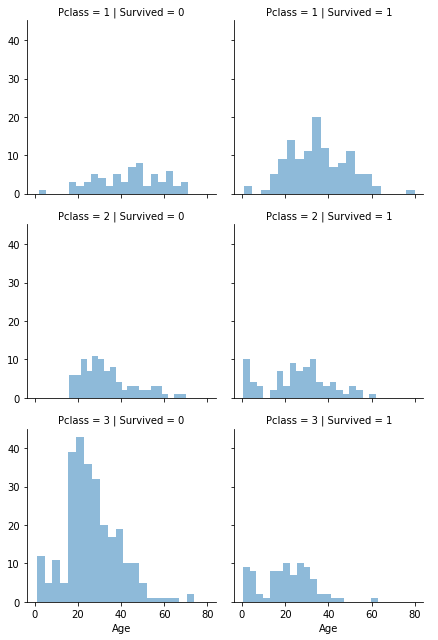

In [131]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
#grid = sns.FacetGrid(train_data, col='Survived', row='Pclass')
#grid.map(plt.hist, 'Age', alpha=.5, bins=20)


g1=sns.FacetGrid(train_data, col="Survived", row="Pclass")
g1.map(plt.hist, "Age", alpha=0.5, bins=20)
g1.add_legend();


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


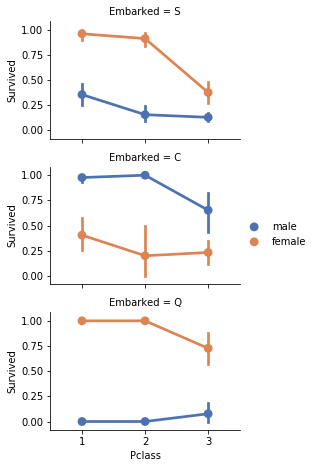

In [132]:

grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [133]:
#correcting
#Ticket, cabin and passengerId can be dropped from the data as they have duplication, incompleteness and no contribution to the survival rate respectively.

print("Before", train_data.shape, test_data.shape, together[0].shape, together[1].shape)
#now we drop 
train_datan = train_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
test_datan = test_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
togethern = [train_datan, test_datan]

"After", train_datan.shape, test_datan.shape, togethern[0].shape, togethern[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 9), (418, 8), (891, 9), (418, 8))

### Creating new feature extracting from existing

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision.**

- We decide to retain the new Title feature for model training.

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [134]:
train_datan.head()
train_datan["Sex"].isnull().sum()



0

In [149]:

guess_ages=np.zeros((2,3))

for dataset in togethern:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)



In [150]:
train_datan.head(50)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35,8.0500,0
5,0,3,"Moran, Mr. James",0,25,8.4583,2
6,0,1,"McCarthy, Mr. Timothy J",0,54,51.8625,0
7,0,3,"Palsson, Master. Gosta Leonard",0,2,21.0750,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,11.1333,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,30.0708,1


In [137]:
train_datan = train_datan.drop(['Parch', 'SibSp'], axis=1)
test_datan = test_datan.drop(['Parch', 'SibSp'], axis=1)
togethern = [train_datan, test_datan]



We can also create an artificial feature combining Pclass and Age.

In [138]:
freq_data = train_datan.Embarked.mode()[0]
freq_data
for dataset in togethern:
    dataset["Embarked"]=dataset["Embarked"].fillna(freq_data)
train_datan[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived", ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [141]:
for dataset in togethern:
     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)





In [142]:
togethern[0].head()


,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0


In [144]:
for dataset in togethern:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)



In [145]:
togethern[1].head()

,Pclass,Name,Sex,Age,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,7.8292,2
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,0
2,2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,2
3,3,"Wirz, Mr. Albert",0,27.0,8.6625,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,0


In [146]:
test_datan.head(10)


,Pclass,Name,Sex,Age,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,7.8292,2
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,7.0000,0
2,2,"Myles, Mr. Thomas Francis",0,62.0,9.6875,2
3,3,"Wirz, Mr. Albert",0,27.0,8.6625,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,12.2875,0
5,3,"Svensson, Mr. Johan Cervin",0,14.0,9.2250,0
6,3,"Connolly, Miss. Kate",1,30.0,7.6292,2
7,2,"Caldwell, Mr. Albert Francis",0,26.0,29.0000,0
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,7.2292,1
9,3,"Davies, Mr. John Samuel",0,21.0,24.1500,0


In [147]:
freq_data = train_datan.Fare.mode()[0]
freq_data
for dataset in togethern:
    dataset["Fare"]=dataset["Fare"].fillna(freq_data)


In [151]:
test_datan.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

## Model, predict and solve



In [ ]:
X_train = train_datan.drop(["Survived","Name"], axis=1)
Y_train = train_datan["Survived"]
X_test  = test_datan.drop(["Name"], axis=1)
X_train.shape, Y_train.shape, X_test.shape
X_test

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [ ]:
X_test.isnull().sum()

In [ ]:
# Logistic Regression

#reg = LogisticRegression()
#reg.fit(X_train, Y_train)
#Y_pred = reg.predict(X_test)
#acc-log = (reg.score(X_train, Y_train) * 100, 2)
#acc-log

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knnscore=round(knn.score(X_train, Y_train) * 100, 2)
knnscore


In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc